In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import time

# パラメータ
n_samples = 10000000  # サンプル数
mu = 0             # 平均
sigma = 1          # 標準偏差
dt = 0.1           # タイムステップ
gamma = 0.1        # 摩擦係数

@njit
def langevin_monte_carlo_jitted(n_samples, mu, sigma, dt, gamma):
    samples = np.empty(n_samples)
    current_state = np.random.randn()
    
    for i in range(n_samples):
        gradient = (current_state - mu) / (sigma ** 2)
        noise = np.random.normal(0, np.sqrt(dt))
        current_state += -gamma * gradient * dt + noise
        samples[i] = current_state
        
    return samples

def langevin_monte_carlo(n_samples, mu, sigma, dt, gamma):
    samples = np.empty(n_samples)
    current_state = np.random.randn()
    
    for i in range(n_samples):
        gradient = (current_state - mu) / (sigma ** 2)
        noise = np.random.normal(0, np.sqrt(dt))
        current_state += -gamma * gradient * dt + noise
        samples[i] = current_state
        
    return samples

In [11]:
# MCMCの実行
start = time.perf_counter()
samples = langevin_monte_carlo(n_samples, mu, sigma, dt, gamma)
end = time.perf_counter()  # 計測終了
print(f"{end-start:.2f} sec.")

13.61 sec.


In [12]:
# MCMCの実行
start = time.perf_counter()
samples = langevin_monte_carlo_jitted(n_samples, mu, sigma, dt, gamma)
end = time.perf_counter()  # 計測終了
print(f"{end-start:.2f} sec.")

0.28 sec.


numa.jitによって、約50倍の高速化が達成できている。

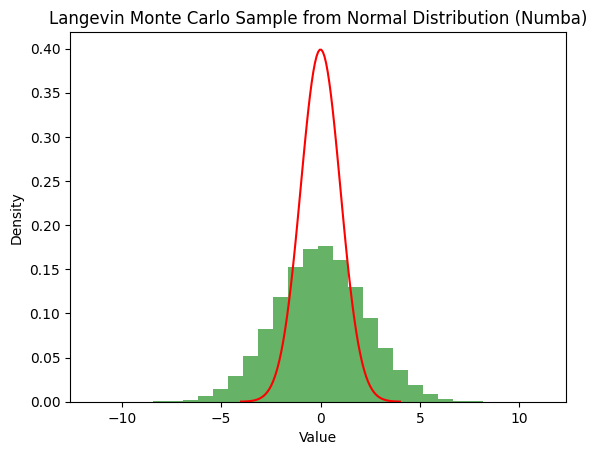

In [13]:
# サンプルのヒストグラムをプロット
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# 理論的な正規分布をプロット
x = np.linspace(-4, 4, 100)
plt.plot(x, (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2), color='r')
plt.title('Langevin Monte Carlo Sample from Normal Distribution (Numba)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()